# Tutorial: Introduction to Missing Data Imputation

Missing data is a common problem in practical data analysis. They are simply observations that we intend to make but did not. In datasets, missing values could be represented as ‘?’, ‘nan’, ’N/A’, blank cell, or sometimes ‘-999’, ’inf’, ‘-inf’. The aim of this tutorial is to provide an introduction of missing data and describe some basic methods on how to handle them.

## Missing data mechanisms

The study of missing data was formalized by Donald Rubin (see [6], [5]) with the concept of missing mechanism in which missing-data indicators are random variables and assigned a distribution. Missing data mechanism describes the underlying mechanism that generates missing data and can be categorized into three types — missing completely at random (MCAR), missing at random (MAR), and missing not at random (MNAR). Informally speaking, MCAR means that the occurrence of missing values is completely at random, not related to any variable. MAR implies that the missingness only relate to the observed data and NMAR refers to the case that the missing values are related to both observed and unobserved variable and the missing mechanism cannot be ignored.

It is important to consider missing data mechanism when deciding how to deal with missing data. If the missing data mechanism is MCAR, some simple method may yield unbiased estimates but when the missing mechanism is NMAR, no method will likely uncover the truth unless additional information is unknown. We start our discussion with some simple methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing and loading data..
data=pd.read_csv("../Datas/Original.csv")

In [3]:
data=data.drop(columns="date")
data

,[PS01=SLC03] Electrical conductivity (EC) [µS/cm],[PS02] Electrical conductivity (EC) [µS/cm],[PS03] Electrical conductivity (EC) [µS/cm],[PS04] Electrical conductivity (EC) [µS/cm],[SLC01] Electrical conductivity (EC) [µS/cm],[SLC02] Electrical conductivity (EC) [µS/cm],[PS01=SLC03] Nitrite (NO2-N) [mg NO2-N/L],[PS02] Nitrite (NO2-N) [mg NO2-N/L],[PS03] Nitrite (NO2-N) [mg NO2-N/L],[PS04] Nitrite (NO2-N) [mg NO2-N/L],...,[PS03] Water temperature (Tw) [ºC],[PS04] Water temperature (Tw) [ºC],[SLC01] Water temperature (Tw) [ºC],[SLC02] Water temperature (Tw) [ºC],[PS01=SLC03] Turbidity (Turb) [NTU],[PS02] Turbidity (Turb) [NTU],[PS03] Turbidity (Turb) [NTU],[PS04] Turbidity (Turb) [NTU],[SLC01] Turbidity (Turb) [NTU],[SLC02] Turbidity (Turb) [NTU]
0,301.2,240.6,239.8,240.9,234.5,239.1,0.2100,0.0160,0.016,0.020,...,27.2,27.4,25.5,26.9,5.7,11.0,8.3,8.8,12.0,9.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,204.6,142.8,182.9,154.5,146.4,191.0,0.0065,0.0012,NaN,0.014,...,21.9,22.1,18.7,18.8,13.0,15.0,19.0,15.0,18.0,15.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187.3,132.3,104.6,95.5,143.7,173.6,0.0160,0.0160,0.016,0.016,...,18.0,18.0,17.2,17.0,15.0,25.0,25.0,26.0,18.0,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,416.1,NaN,NaN,NaN,223.5,423.4,0.0770,NaN,NaN,NaN,...,NaN,NaN,18.9,19.3,16.1,NaN,NaN,NaN,64.7,8.96
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## Getting some statistics and data description
data.describe()

,[PS01=SLC03] Electrical conductivity (EC) [µS/cm],[PS02] Electrical conductivity (EC) [µS/cm],[PS03] Electrical conductivity (EC) [µS/cm],[PS04] Electrical conductivity (EC) [µS/cm],[SLC01] Electrical conductivity (EC) [µS/cm],[SLC02] Electrical conductivity (EC) [µS/cm],[PS01=SLC03] Nitrite (NO2-N) [mg NO2-N/L],[PS02] Nitrite (NO2-N) [mg NO2-N/L],[PS03] Nitrite (NO2-N) [mg NO2-N/L],[PS04] Nitrite (NO2-N) [mg NO2-N/L],...,[PS03] Water temperature (Tw) [ºC],[PS04] Water temperature (Tw) [ºC],[SLC01] Water temperature (Tw) [ºC],[SLC02] Water temperature (Tw) [ºC],[PS01=SLC03] Turbidity (Turb) [NTU],[PS02] Turbidity (Turb) [NTU],[PS03] Turbidity (Turb) [NTU],[PS04] Turbidity (Turb) [NTU],[SLC01] Turbidity (Turb) [NTU],[SLC02] Turbidity (Turb) [NTU]
count,28.000000,32.000000,32.000000,32.000000,37.000000,37.000000,28.000000,32.000000,30.000000,31.000000,...,32.000000,32.000000,37.000000,37.000000,27.000000,31.000000,30.000000,30.000000,36.000000,36.000000
mean,269.528571,169.500000,185.912500,171.537500,241.629730,272.545946,0.037136,0.010859,0.012080,0.010613,...,20.265625,20.496875,18.618919,19.175676,19.004074,19.203548,20.936667,20.682000,21.525000,15.186111
std,93.911053,53.684076,62.925198,56.174795,88.739885,101.455279,0.049056,0.010239,0.008421,0.008807,...,5.168865,5.126684,5.186834,5.621210,17.326920,8.673142,8.745382,8.095222,14.894455,10.838258
min,81.000000,66.800000,57.800000,61.200000,52.800000,78.300000,0.000000,0.000000,0.000000,0.000000,...,11.100000,11.200000,8.400000,8.900000,1.500000,4.400000,8.300000,5.860000,2.700000,1.800000
25%,221.175000,138.050000,153.400000,139.400000,169.500000,207.600000,0.008375,0.000375,0.001925,0.000000,...,16.850000,17.875000,14.800000,15.200000,9.100000,13.000000,14.000000,15.250000,12.000000,8.770000
50%,272.300000,166.450000,193.850000,175.350000,239.900000,262.700000,0.018000,0.014500,0.016000,0.014000,...,21.200000,20.950000,18.900000,18.900000,14.000000,17.300000,19.000000,19.800000,16.000000,13.750000
75%,329.275000,206.775000,223.950000,216.475000,315.600000,339.100000,0.050250,0.016000,0.018250,0.017500,...,25.275000,25.525000,22.700000,23.400000,20.700000,25.000000,25.150000,25.800000,27.075000,18.000000
max,437.500000,271.400000,327.900000,275.900000,390.600000,459.000000,0.210000,0.041400,0.023000,0.023000,...,27.400000,27.800000,26.700000,28.200000,73.500000,40.600000,50.000000,41.400000,64.700000,45.000000


In [5]:
## Fow many missing data?
data.isnull().sum()/len(data)*100

[PS01=SLC03] Electrical conductivity (EC) [µS/cm]    65.00
[PS02] Electrical conductivity (EC) [µS/cm]          60.00
[PS03] Electrical conductivity (EC) [µS/cm]          60.00
[PS04] Electrical conductivity (EC) [µS/cm]          60.00
[SLC01] Electrical conductivity (EC) [µS/cm]         53.75
[SLC02] Electrical conductivity (EC) [µS/cm]         53.75
[PS01=SLC03] Nitrite (NO2-N) [mg NO2-N/L]            65.00
[PS02] Nitrite (NO2-N) [mg NO2-N/L]                  60.00
[PS03] Nitrite (NO2-N) [mg NO2-N/L]                  62.50
[PS04] Nitrite (NO2-N) [mg NO2-N/L]                  61.25
[SLC01] Nitrite (NO2-N) [mg NO2-N/L]                 53.75
[SLC02] Nitrite (NO2-N) [mg NO2-N/L]                 53.75
[PS01=SLC03] Nitrate (NO3-N) [mg NO3-N/L]            65.00
[PS02] Nitrate (NO3-N) [mg NO3-N/L]                  60.00
[PS03] Nitrate (NO3-N) [mg NO3-N/L]                  61.25
[PS04] Nitrate (NO3-N) [mg NO3-N/L]                  61.25
[SLC01] Nitrate (NO3-N) [mg NO3-N/L]                 53.

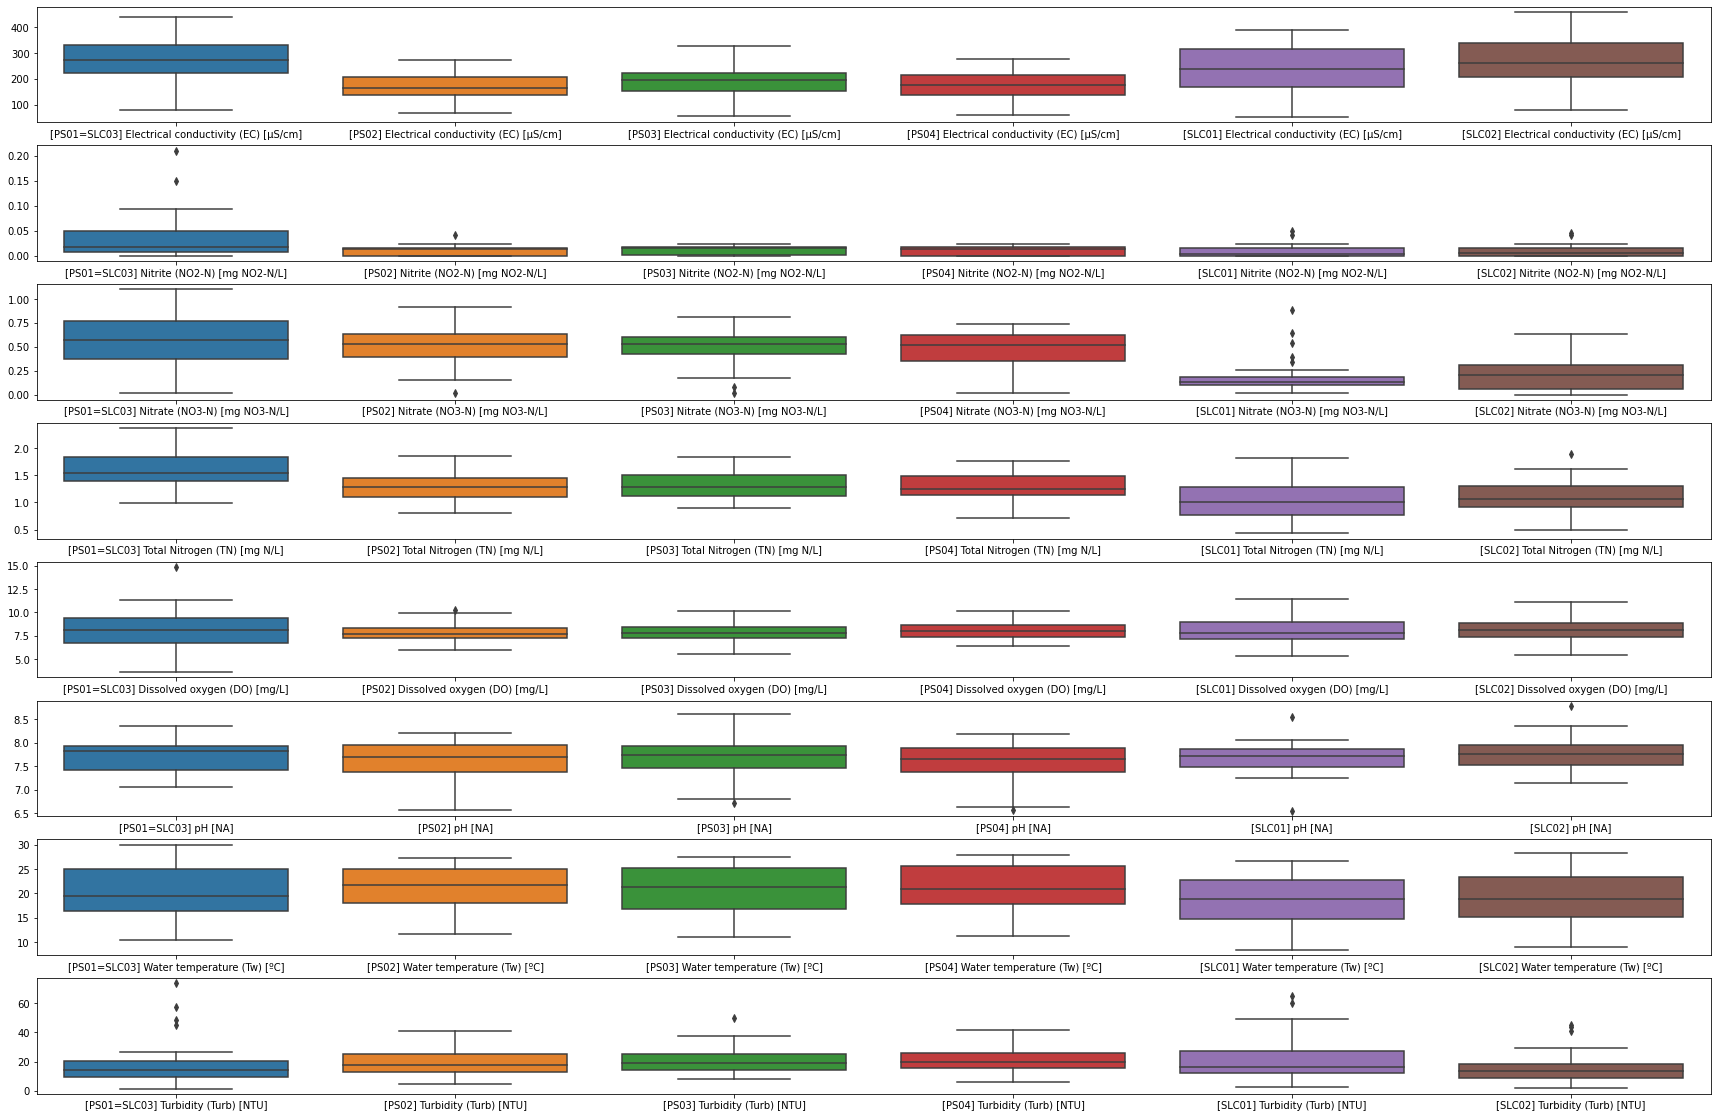

In [6]:
plt.figure(figsize=(30,20))
plt.subplot(811)
sns.boxplot(data=data[data.columns[data.columns.str.contains("Electrical")]],orient="v")
plt.subplot(812)
sns.boxplot(data=data[data.columns[data.columns.str.contains("Nitrite")]],orient="v")
plt.subplot(813)
sns.boxplot(data=data[data.columns[data.columns.str.contains("Nitrate")]],orient="v")
plt.subplot(814)
sns.boxplot(data=data[data.columns[data.columns.str.contains("Nitrogen")]],orient="v")
plt.subplot(815)
sns.boxplot(data=data[data.columns[data.columns.str.contains("oxygen")]],orient="v")
plt.subplot(816)
sns.boxplot(data=data[data.columns[data.columns.str.contains("pH")]],orient="v")
plt.subplot(817)
sns.boxplot(data=data[data.columns[data.columns.str.contains("temperature")]],orient="v")
plt.subplot(818)
sns.boxplot(data=data[data.columns[data.columns.str.contains("Turbidity")]],orient="v")
plt.show()

## Complete Case Analysis

As we can imagine, the simplest thing to do is to ignore the missing values. This approach is known as complete case analysis where we only consider observations where all variables are observed. To drop entries with missing values in any column in pandas, we can use:

In [7]:
data_cc=data.dropna()
data_cc

,[PS01=SLC03] Electrical conductivity (EC) [µS/cm],[PS02] Electrical conductivity (EC) [µS/cm],[PS03] Electrical conductivity (EC) [µS/cm],[PS04] Electrical conductivity (EC) [µS/cm],[SLC01] Electrical conductivity (EC) [µS/cm],[SLC02] Electrical conductivity (EC) [µS/cm],[PS01=SLC03] Nitrite (NO2-N) [mg NO2-N/L],[PS02] Nitrite (NO2-N) [mg NO2-N/L],[PS03] Nitrite (NO2-N) [mg NO2-N/L],[PS04] Nitrite (NO2-N) [mg NO2-N/L],...,[PS03] Water temperature (Tw) [ºC],[PS04] Water temperature (Tw) [ºC],[SLC01] Water temperature (Tw) [ºC],[SLC02] Water temperature (Tw) [ºC],[PS01=SLC03] Turbidity (Turb) [NTU],[PS02] Turbidity (Turb) [NTU],[PS03] Turbidity (Turb) [NTU],[PS04] Turbidity (Turb) [NTU],[SLC01] Turbidity (Turb) [NTU],[SLC02] Turbidity (Turb) [NTU]
0,301.2,240.6,239.8,240.9,234.5,239.1,0.2100,0.0160,0.0160,0.0200,...,27.2,27.4,25.5,26.9,5.70,11.00,8.3,8.80,12.0,9.00
6,81.0,72.3,62.0,65.6,78.9,78.3,0.0200,0.0200,0.0200,0.0200,...,12.5,12.5,9.4,10.6,45.00,40.00,50.0,40.00,40.0,45.00
8,155.5,66.8,57.8,61.2,139.1,143.1,0.0920,0.0160,0.0160,0.0160,...,16.9,18.6,17.2,16.6,21.00,27.00,29.0,27.00,20.0,22.00
22,344.8,184.7,192.6,188.3,315.0,336.2,0.0230,0.0230,0.0230,0.0230,...,21.4,21.7,21.6,21.8,5.50,22.00,23.0,22.00,9.2,9.50
24,266.9,165.4,166.6,176.2,168.2,243.2,0.0190,0.0190,0.0190,0.0190,...,26.3,26.3,24.2,26.2,9.40,13.00,14.0,17.00,12.0,12.00
33,328.6,149.2,205.4,153.4,272.6,303.5,0.0190,0.0190,0.0190,0.0190,...,19.1,20.6,18.9,18.0,3.30,20.00,17.0,19.00,9.2,4.70
37,245.7,256.4,195.1,221.7,311.1,215.4,0.0000,0.0000,0.0000,0.0000,...,27.4,27.8,24.0,25.7,13.00,4.40,12.0,9.10,16.0,13.00
39,331.3,177.7,208.6,178.2,329.9,261.7,0.0490,0.0000,0.0000,0.0000,...,19.1,19.6,18.4,18.5,2.90,16.00,21.0,16.00,2.7,3.40
45,288.9,115.6,187.1,157.7,261.8,274.6,0.0540,0.0000,0.0000,0.0000,...,18.9,18.8,18.6,18.2,8.80,26.00,22.0,24.00,15.0,12.00
47,410.5,227.1,238.8,229.9,332.5,380.6,0.1500,0.0009,0.0009,0.0000,...,25.2,25.1,23.9,25.2,1.50,11.00,13.0,13.00,5.0,2.00


In general, this method should not be used unless the proportion of missing values is very small (<5%). Complete case analysis has the cost of having less data and the result is highly likely to be biased if the missing mechanism is not MCAR.

Besides complete case analysis, all other methods that we will talk about in this tutorial are all imputation methods. Imputation simply means that we replace the missing values with some guessed/estimated ones.

## Mean, median, mode imputation

A simple guess of a missing value is the mean, median, or mode (most frequently appeared value) of that variable. In pandas, .fillna can be used to replace NA’s with a specified value.

In [8]:
def impute_mean(data):
    data_imputed=pd.DataFrame()
    for i in data.columns:
        data_imputed[i]=data[i].fillna(value=data[i].mean())
    return data_imputed
def impute_median(data):
    data_imputed=pd.DataFrame()
    for i in data.columns:
        data_imputed[i]=data[i].fillna(value=data[i].median())
    return data_imputed

In [9]:
data_mean=impute_mean(data)
data_mean

,[PS01=SLC03] Electrical conductivity (EC) [µS/cm],[PS02] Electrical conductivity (EC) [µS/cm],[PS03] Electrical conductivity (EC) [µS/cm],[PS04] Electrical conductivity (EC) [µS/cm],[SLC01] Electrical conductivity (EC) [µS/cm],[SLC02] Electrical conductivity (EC) [µS/cm],[PS01=SLC03] Nitrite (NO2-N) [mg NO2-N/L],[PS02] Nitrite (NO2-N) [mg NO2-N/L],[PS03] Nitrite (NO2-N) [mg NO2-N/L],[PS04] Nitrite (NO2-N) [mg NO2-N/L],...,[PS03] Water temperature (Tw) [ºC],[PS04] Water temperature (Tw) [ºC],[SLC01] Water temperature (Tw) [ºC],[SLC02] Water temperature (Tw) [ºC],[PS01=SLC03] Turbidity (Turb) [NTU],[PS02] Turbidity (Turb) [NTU],[PS03] Turbidity (Turb) [NTU],[PS04] Turbidity (Turb) [NTU],[SLC01] Turbidity (Turb) [NTU],[SLC02] Turbidity (Turb) [NTU]
0,301.200000,240.6,239.8000,240.9000,234.50000,239.100000,0.210000,0.016000,0.01600,0.020000,...,27.200000,27.400000,25.500000,26.900000,5.700000,11.000000,8.300000,8.800,12.000,9.000000
1,269.528571,169.5,185.9125,171.5375,241.62973,272.545946,0.037136,0.010859,0.01208,0.010613,...,20.265625,20.496875,18.618919,19.175676,19.004074,19.203548,20.936667,20.682,21.525,15.186111
2,204.600000,142.8,182.9000,154.5000,146.40000,191.000000,0.006500,0.001200,0.01208,0.014000,...,21.900000,22.100000,18.700000,18.800000,13.000000,15.000000,19.000000,15.000,18.000,15.000000
3,269.528571,169.5,185.9125,171.5375,241.62973,272.545946,0.037136,0.010859,0.01208,0.010613,...,20.265625,20.496875,18.618919,19.175676,19.004074,19.203548,20.936667,20.682,21.525,15.186111
4,187.300000,132.3,104.6000,95.5000,143.70000,173.600000,0.016000,0.016000,0.01600,0.016000,...,18.000000,18.000000,17.200000,17.000000,15.000000,25.000000,25.000000,26.000,18.000,18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,416.100000,169.5,185.9125,171.5375,223.50000,423.400000,0.077000,0.010859,0.01208,0.010613,...,20.265625,20.496875,18.900000,19.300000,16.100000,19.203548,20.936667,20.682,64.700,8.960000
76,269.528571,169.5,185.9125,171.5375,241.62973,272.545946,0.037136,0.010859,0.01208,0.010613,...,20.265625,20.496875,18.618919,19.175676,19.004074,19.203548,20.936667,20.682,21.525,15.186111
77,269.528571,169.5,185.9125,171.5375,241.62973,272.545946,0.037136,0.010859,0.01208,0.010613,...,20.265625,20.496875,18.618919,19.175676,19.004074,19.203548,20.936667,20.682,21.525,15.186111
78,269.528571,169.5,185.9125,171.5375,241.62973,272.545946,0.037136,0.010859,0.01208,0.010613,...,20.265625,20.496875,18.618919,19.175676,19.004074,19.203548,20.936667,20.682,21.525,15.186111


In [10]:
data_median=impute_median(data)
data_median

,[PS01=SLC03] Electrical conductivity (EC) [µS/cm],[PS02] Electrical conductivity (EC) [µS/cm],[PS03] Electrical conductivity (EC) [µS/cm],[PS04] Electrical conductivity (EC) [µS/cm],[SLC01] Electrical conductivity (EC) [µS/cm],[SLC02] Electrical conductivity (EC) [µS/cm],[PS01=SLC03] Nitrite (NO2-N) [mg NO2-N/L],[PS02] Nitrite (NO2-N) [mg NO2-N/L],[PS03] Nitrite (NO2-N) [mg NO2-N/L],[PS04] Nitrite (NO2-N) [mg NO2-N/L],...,[PS03] Water temperature (Tw) [ºC],[PS04] Water temperature (Tw) [ºC],[SLC01] Water temperature (Tw) [ºC],[SLC02] Water temperature (Tw) [ºC],[PS01=SLC03] Turbidity (Turb) [NTU],[PS02] Turbidity (Turb) [NTU],[PS03] Turbidity (Turb) [NTU],[PS04] Turbidity (Turb) [NTU],[SLC01] Turbidity (Turb) [NTU],[SLC02] Turbidity (Turb) [NTU]
0,301.2,240.60,239.80,240.90,234.5,239.1,0.2100,0.0160,0.016,0.020,...,27.2,27.40,25.5,26.9,5.7,11.0,8.3,8.8,12.0,9.00
1,272.3,166.45,193.85,175.35,239.9,262.7,0.0180,0.0145,0.016,0.014,...,21.2,20.95,18.9,18.9,14.0,17.3,19.0,19.8,16.0,13.75
2,204.6,142.80,182.90,154.50,146.4,191.0,0.0065,0.0012,0.016,0.014,...,21.9,22.10,18.7,18.8,13.0,15.0,19.0,15.0,18.0,15.00
3,272.3,166.45,193.85,175.35,239.9,262.7,0.0180,0.0145,0.016,0.014,...,21.2,20.95,18.9,18.9,14.0,17.3,19.0,19.8,16.0,13.75
4,187.3,132.30,104.60,95.50,143.7,173.6,0.0160,0.0160,0.016,0.016,...,18.0,18.00,17.2,17.0,15.0,25.0,25.0,26.0,18.0,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,416.1,166.45,193.85,175.35,223.5,423.4,0.0770,0.0145,0.016,0.014,...,21.2,20.95,18.9,19.3,16.1,17.3,19.0,19.8,64.7,8.96
76,272.3,166.45,193.85,175.35,239.9,262.7,0.0180,0.0145,0.016,0.014,...,21.2,20.95,18.9,18.9,14.0,17.3,19.0,19.8,16.0,13.75
77,272.3,166.45,193.85,175.35,239.9,262.7,0.0180,0.0145,0.016,0.014,...,21.2,20.95,18.9,18.9,14.0,17.3,19.0,19.8,16.0,13.75
78,272.3,166.45,193.85,175.35,239.9,262.7,0.0180,0.0145,0.016,0.014,...,21.2,20.95,18.9,18.9,14.0,17.3,19.0,19.8,16.0,13.75


## Regression imputation

Mean, median or mode imputation only look at the distribution of the values of the variable with missing entries. If we know there is a correlation between the missing value and other variables, we can often get better guesses by regressing the missing variable on other variables.

In [11]:
corr=data.corr()
plt.figure(figsize=(20,20))
corr.style.background_gradient(cmap="jet").format(precision=2)

,[PS01=SLC03] Electrical conductivity (EC) [µS/cm],[PS02] Electrical conductivity (EC) [µS/cm],[PS03] Electrical conductivity (EC) [µS/cm],[PS04] Electrical conductivity (EC) [µS/cm],[SLC01] Electrical conductivity (EC) [µS/cm],[SLC02] Electrical conductivity (EC) [µS/cm],[PS01=SLC03] Nitrite (NO2-N) [mg NO2-N/L],[PS02] Nitrite (NO2-N) [mg NO2-N/L],[PS03] Nitrite (NO2-N) [mg NO2-N/L],[PS04] Nitrite (NO2-N) [mg NO2-N/L],[SLC01] Nitrite (NO2-N) [mg NO2-N/L],[SLC02] Nitrite (NO2-N) [mg NO2-N/L],[PS01=SLC03] Nitrate (NO3-N) [mg NO3-N/L],[PS02] Nitrate (NO3-N) [mg NO3-N/L],[PS03] Nitrate (NO3-N) [mg NO3-N/L],[PS04] Nitrate (NO3-N) [mg NO3-N/L],[SLC01] Nitrate (NO3-N) [mg NO3-N/L],[SLC02] Nitrate (NO3-N) [mg NO3-N/L],[PS01=SLC03] Total Nitrogen (TN) [mg N/L],[PS02] Total Nitrogen (TN) [mg N/L],[PS03] Total Nitrogen (TN) [mg N/L],[PS04] Total Nitrogen (TN) [mg N/L],[SLC01] Total Nitrogen (TN) [mg N/L],[SLC02] Total Nitrogen (TN) [mg N/L],[PS01=SLC03] Dissolved oxygen (DO) [mg/L],[PS02] Dissolved oxygen (DO) [mg/L],[PS03] Dissolved oxygen (DO) [mg/L],[PS04] Dissolved oxygen (DO) [mg/L],[SLC01] Dissolved oxygen (DO) [mg/L],[SLC02] Dissolved oxygen (DO) [mg/L],[PS01=SLC03] pH [NA],[PS02] pH [NA],[PS03] pH [NA],[PS04] pH [NA],[SLC01] pH [NA],[SLC02] pH [NA],[PS01=SLC03] Water temperature (Tw) [ºC],[PS02] Water temperature (Tw) [ºC],[PS03] Water temperature (Tw) [ºC],[PS04] Water temperature (Tw) [ºC],[SLC01] Water temperature (Tw) [ºC],[SLC02] Water temperature (Tw) [ºC],[PS01=SLC03] Turbidity (Turb) [NTU],[PS02] Turbidity (Turb) [NTU],[PS03] Turbidity (Turb) [NTU],[PS04] Turbidity (Turb) [NTU],[SLC01] Turbidity (Turb) [NTU],[SLC02] Turbidity (Turb) [NTU]
[PS01=SLC03] Electrical conductivity (EC) [µS/cm],1.00,0.54,0.66,0.62,0.85,0.89,0.38,-0.25,-0.38,-0.46,0.14,-0.10,0.22,0.33,0.34,0.37,-0.21,-0.62,0.07,0.07,0.15,0.19,-0.02,-0.52,0.04,0.04,-0.00,0.06,-0.56,-0.34,0.11,0.21,0.05,0.22,-0.24,0.28,0.53,0.53,0.50,0.50,0.56,0.56,-0.64,-0.43,-0.56,-0.46,-0.34,-0.86
[PS02] Electrical conductivity (EC) [µS/cm],0.54,1.00,0.85,0.96,0.65,0.65,0.26,-0.22,-0.30,-0.42,0.05,0.03,0.38,0.17,0.16,0.20,0.08,-0.30,0.32,-0.44,-0.38,-0.37,0.12,-0.20,-0.42,-0.09,-0.25,-0.11,-0.63,-0.52,-0.24,0.46,0.34,0.45,0.07,0.29,0.66,0.48,0.51,0.51,0.46,0.52,-0.03,-0.70,-0.70,-0.62,-0.18,-0.57
[PS03] Electrical conductivity (EC) [µS/cm],0.66,0.85,1.00,0.94,0.69,0.74,0.26,-0.19,-0.26,-0.35,0.04,0.01,0.36,0.31,0.29,0.42,-0.16,-0.32,0.32,-0.35,-0.32,-0.26,-0.12,-0.42,-0.36,0.00,-0.01,0.05,-0.47,-0.34,-0.19,0.55,0.52,0.59,0.22,0.50,0.54,0.23,0.27,0.27,0.23,0.29,-0.14,-0.50,-0.66,-0.49,0.01,-0.66
[PS04] Electrical conductivity (EC) [µS/cm],0.62,0.96,0.94,1.00,0.70,0.73,0.29,-0.22,-0.29,-0.41,0.04,0.02,0.40,0.27,0.24,0.32,-0.09,-0.35,0.36,-0.40,-0.35,-0.33,-0.02,-0.31,-0.40,-0.07,-0.17,-0.03,-0.61,-0.49,-0.23,0.48,0.38,0.52,0.13,0.35,0.65,0.44,0.47,0.47,0.43,0.49,-0.07,-0.64,-0.68,-0.58,-0.14,-0.61
[SLC01] Electrical conductivity (EC) [µS/cm],0.85,0.65,0.69,0.70,1.00,0.85,0.29,-0.37,-0.41,-0.44,0.02,-0.11,0.23,0.14,0.20,0.22,-0.19,-0.52,0.03,-0.34,-0.33,-0.30,-0.42,-0.63,-0.10,0.01,-0.17,-0.00,-0.51,-0.44,0.07,0.48,0.32,0.43,0.01,0.37,0.60,0.35,0.33,0.34,0.43,0.48,-0.45,-0.40,-0.50,-0.38,-0.35,-0.73
[SLC02] Electrical conductivity (EC) [µS/cm],0.89,0.65,0.74,0.73,0.85,1.00,0.33,-0.28,-0.25,-0.36,0.04,-0.09,0.29,0.19,0.15,0.22,-0.28,-0.57,0.17,-0.29,-0.28,-0.24,-0.25,-0.55,-0.03,0.04,0.04,0.10,-0.43,-0.32,0.05,0.36,0.28,0.45,0.02,0.41,0.52,0.26,0.26,0.27,0.37,0.42,-0.25,-0.35,-0.45,-0.29,-0.06,-0.71
[PS01=SLC03] Nitrite (NO2-N) [mg NO2-N/L],0.38,0.26,0.26,0.29,0.29,0.33,1.00,0.04,-0.07,0.03,0.46,0.42,0.15,0.34,0.16,0.25,-0.23,-0.26,0.34,0.29,0.09,0.14,0.05,-0.27,-0.08,-0.32,-0.19,-0.23,-0.37,-0.41,-0.03,-0.10,0.02,-0.04,-0.21,-0.05,0.37,0.36,0.41,0.42,0.41,0.43,-0.21,-0.27,-0.36,-0.36,-0.16,-0.35
[PS02] Nitrite (NO2-N) [mg NO2-N/L],-0.25,-0.22,-0.19,-0.22,-0.37,-0.28,0.04,1.00,0.84,0.94,0.68,0.85,-0.17,-0.07,0.02,-0.17,0.08,0.30,0.13,0.12,0.07,0.16,0.04,0.24,-0.07,0.04,0.11,-0.03,0

<Figure size 1440x1440 with 0 Axes>

This method consists in that if we have a variable that has no missing data and it is directly correlated with some other variable then we can use regression to impute the variable with missing data. This only works if one of the variables has all the data complete and if sufficient correlation is found between the variable with missing data and the variable with no missing data.

Now we have more advanced methods that use machine learning and all the machine learning tools to do the imputations with much more benefits.

# Imputation with Machine Learning

In [12]:
#Regressors:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge, GammaRegressor, HuberRegressor, PoissonRegressor, Ridge, TheilSenRegressor, TweedieRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [13]:
imp_RF = IterativeImputer(estimator=RandomForestRegressor(),verbose=1,add_indicator=False)
imp_RF.fit(data)
data_imp_RF=pd.DataFrame(imp_RF.transform(data),columns=data.columns)

[IterativeImputer] Completing matrix with shape (80, 48)
[IterativeImputer] Change: 132.60429280510752, scaled tolerance: 0.459 
[IterativeImputer] Change: 155.48563199999992, scaled tolerance: 0.459 
[IterativeImputer] Change: 47.759152999999955, scaled tolerance: 0.459 
[IterativeImputer] Change: 49.27958199999997, scaled tolerance: 0.459 
[IterativeImputer] Change: 29.884883000000364, scaled tolerance: 0.459 
[IterativeImputer] Change: 35.07809800000014, scaled tolerance: 0.459 
[IterativeImputer] Change: 31.095389000000267, scaled tolerance: 0.459 
[IterativeImputer] Change: 22.735868000000274, scaled tolerance: 0.459 
[IterativeImputer] Change: 19.73459200000037, scaled tolerance: 0.459 
[IterativeImputer] Change: 28.05296099999987, scaled tolerance: 0.459 
[IterativeImputer] Completing matrix with shape (80, 48)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [14]:
imp_KNN = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),verbose=1,add_indicator=False)
imp_KNN.fit(data)
data_imp_KNN=pd.DataFrame(imp_KNN.transform(data),columns=data.columns)

[IterativeImputer] Completing matrix with shape (80, 48)
[IterativeImputer] Change: 208.14416557123656, scaled tolerance: 0.459 
[IterativeImputer] Change: 35.77065000000004, scaled tolerance: 0.459 
[IterativeImputer] Change: 2.7383000000000557, scaled tolerance: 0.459 
[IterativeImputer] Change: 0.0, scaled tolerance: 0.459 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (80, 48)


In [15]:
imp_GB = IterativeImputer(estimator=GradientBoostingRegressor(),verbose=1,add_indicator=False)
imp_GB.fit(data)
data_imp_GB=pd.DataFrame(imp_GB.transform(data),columns=data.columns)

[IterativeImputer] Completing matrix with shape (80, 48)
[IterativeImputer] Change: 127.53909682649056, scaled tolerance: 0.459 
[IterativeImputer] Change: 171.00728922909443, scaled tolerance: 0.459 
[IterativeImputer] Change: 87.4571716714048, scaled tolerance: 0.459 
[IterativeImputer] Change: 59.5594770634152, scaled tolerance: 0.459 
[IterativeImputer] Change: 46.39700796218854, scaled tolerance: 0.459 
[IterativeImputer] Change: 50.879977032214704, scaled tolerance: 0.459 
[IterativeImputer] Change: 30.476355217547656, scaled tolerance: 0.459 
[IterativeImputer] Change: 93.27938586144946, scaled tolerance: 0.459 
[IterativeImputer] Change: 31.3216506414778, scaled tolerance: 0.459 
[IterativeImputer] Change: 44.85899850713925, scaled tolerance: 0.459 
[IterativeImputer] Completing matrix with shape (80, 48)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Measuring the outcome of the evaluation

We can use many metrics to evaluate. Here I am going to use three metrics to be able to evaluate how good we have been able to evaluate how well we have been able to impute.

Metric to evaluate:

**Nash-Sutcliffe efficiency (NSE)**
\begin{equation}
NSE=1-\frac{\sum (x_i^{obs}-x_i^{imp})^2}{\sum (x_i^{obs}-\bar x_i^{obs})^2}.
\end{equation}

**Kling-Gupta efficiency (KGE)**
\begin{equation}
KGE=1-\sqrt{(r-1)^2+(\alpha-1)^2+(\beta-1)^2},
\end{equation}
where $\alpha=\sigma^{imp}/\sigma^{obs}$, $\beta=\mu^{imp}/\mu^{obs}$, $\mu^{imp}$ and $\mu^{obs}$ are the mean of imputed and observed data, $\sigma^{imp}$ and $\sigma^{obs}$ are the standar deviation of imputed and observed data, and $r$ is the correlation coeffient between imputed and observed data.

**Percent bias (PBIAS)**
\begin{equation}
PBIAS=100\times\frac{\sum (x_i^{obs}-x_i^{imp})}{\sum (x_i^{obs})}
\end{equation}

The optimal value of PBIAS is 0, with lower values indicating accurate model imputation. Positive values denote an underestimation bias of the model, and negative values indicate an overestimation bias of the model. NSE varies between −$\infty$ and 1. If NSE is 1, the imputed values match the records perfectly. If NSE is 0, the imputed values are as good as the observation mean. If NSE is negative, the observation mean is a better predictor than imputed values. Therefore, higher NSE values are desirable since they indicate a more accurate imputation model. Unlike NSE, there are not well-defined KGE thresholds that define a “good” model. For this reason, the current literature tends to interpret KGE values similarly to NSE: negative values indicate “bad” model performance, while positive values indicate “good” model performance.

In [16]:
def get_metrics(impute_data):
    df=data
    var,kge,nse,pbias=[],[],[],[]
    for i in df.columns:
        NSE=1-(np.sum((df[i].replace(np.nan,0)-impute_data[i])**2)/np.sum((df[i].replace(np.nan,0)-df[i].replace(np.nan,0).mean())**2))
        KGE=1-np.sqrt((np.corrcoef(df[i].replace(np.nan,0),impute_data[i])[0][1]-1)**2+
                      (impute_data[i].mean()/df[i].mean()-1)**2+
                      (impute_data[i].std()/df[i].std()-1)**2)
        PBIAS=100*(np.sum((df[i].replace(np.nan,0)-impute_data[i]))/np.sum((df[i].replace(np.nan,0))))
        var.append(i)
        nse.append(NSE)
        kge.append(KGE)
        pbias.append(PBIAS)
        results=pd.DataFrame({"Variable":var,"NSE":nse,"KGE":kge,"PBIAS":pbias})
        results_imp=results[(results["NSE"]!=1)&(results["KGE"]!=1)&(results["PBIAS"]!=0)]
    return results_imp

In [17]:
get_metrics(data_imp_RF)

,Variable,NSE,KGE,PBIAS
0,[PS01=SLC03] Electrical conductivity (EC) [µS/cm],-2.041284,0.044474,-207.786559
1,[PS02] Electrical conductivity (EC) [µS/cm],-0.430993,0.573465,-122.081582
2,[PS03] Electrical conductivity (EC) [µS/cm],-1.092243,0.308708,-148.183756
3,[PS04] Electrical conductivity (EC) [µS/cm],-0.663261,0.483270,-131.838938
4,[SLC01] Electrical conductivity (EC) [µS/cm],-0.933518,0.266902,-122.583884
5,[SLC02] Electrical conductivity (EC) [µS/cm],-0.741433,0.353569,-116.647766
6,[PS01=SLC03] Nitrite (NO2-N) [mg NO2-N/L],0.659352,0.535566,-112.317946
7,[PS02] Nitrite (NO2-N) [mg NO2-N/L],0.984307,0.404518,-9.872230
8,[PS03] Nitrite (NO2-N) [mg NO2-N/L],0.720954,0.522688,-47.936258
9,[PS04] Nitrite (NO2-N) [mg NO2-N/L],0.850888,0.437253,-18.120061


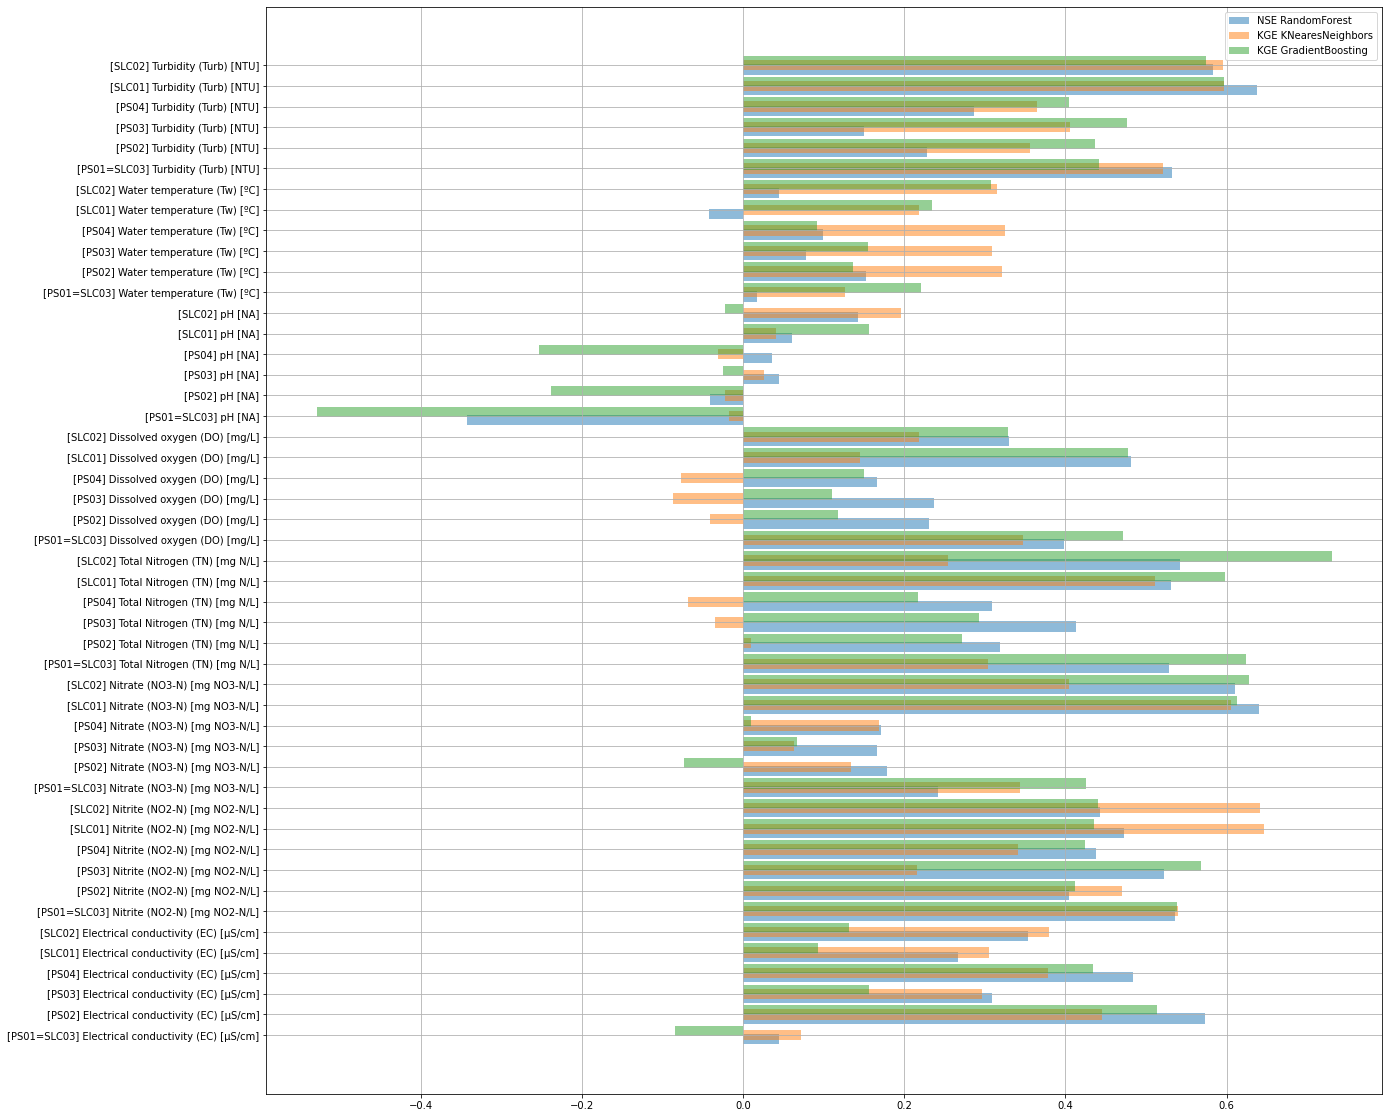

In [18]:
plt.figure(figsize=(20,20))
plt.barh(np.arange(len(get_metrics(data_imp_RF)["Variable"]))-.2,get_metrics(data_imp_RF)["KGE"],height=0.5,alpha=0.5,label="NSE RandomForest")
plt.barh(np.arange(len(get_metrics(data_imp_KNN)["Variable"]))+.0,get_metrics(data_imp_KNN)["KGE"],height=0.5,alpha=0.5,label="KGE KNearesNeighbors")
plt.barh(np.arange(len(get_metrics(data_imp_GB)["Variable"]))+.2,get_metrics(data_imp_GB)["KGE"],height=0.5,alpha=0.5,label="KGE GradientBoosting")
plt.yticks(np.arange(len(get_metrics(data_imp_GB)["Variable"])),get_metrics(data_imp_GB)["Variable"])
#get_metrics(df_imp_AB).plot.barh(x="NSE",y=get_metrics(df_imp_AB).index)
plt.legend()
plt.grid()
plt.show()

Based on: https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb